# Data Scientist Job Market in the U.S.

### Obvective: Clean up data

Import necessary libraries

In [ ]:
import pandas as pd
df = pd.read_csv('alldata.csv')

In [8]:
import seaborn as sns

### EDA

Check overview of the df

In [9]:
df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


Check first 5 rows

In [10]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


Check last 5 rows

In [11]:
df.tail()

,position,company,description,reviews,location
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"
6963,"Principal Data Scientist, Deep Learning",Comcast,Comcast’s Technology &amp; Product organizatio...,11610.0,"Sunnyvale, CA 94089"


Check the variable types of each column

In [12]:
df.dtypes

position        object
company         object
description     object
reviews        float64
location        object
dtype: object

### Missing Values

Note: Lots of dirty data, inconsistencies, empty values, random stuff, etc

<Axes: >

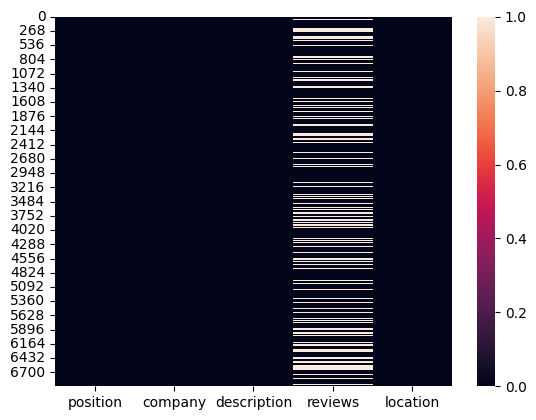

In [15]:
cols = df.columns
sns.heatmap(df[cols].isnull())

Drop all rows with missing values, but only for reviews and location

In [17]:
dropped_rows = df.dropna(subset=['reviews','location'])

In [18]:
print(dropped_rows['reviews'].isnull().sum())

0


Drop the entire reviews column

In [19]:
df_dropped = df.drop(['reviews'], axis=1)

In [20]:
df_dropped.columns

Index(['position', 'company', 'description', 'location'], dtype='object')

Replace all NaN values to 0

In [21]:
df.reviews = df.reviews.fillna(0)

In [22]:
df.reviews.head()

0      0.0
1      0.0
2      0.0
3     44.0
4    550.0
Name: reviews, dtype: float64

### Outliers

Check the data for odd values

<Axes: xlabel='reviews'>

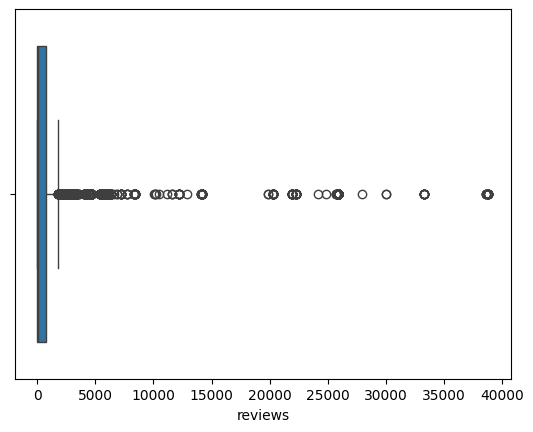

In [61]:
sns.boxplot(x=df.reviews)

Remove all values of reviews over 60000

In [24]:
df = df[df['reviews'] < 60000]

In [26]:
df.describe()

,reviews
count,6959.000000
mean,2326.677827
std,6417.707014
min,0.000000
25%,2.000000
50%,79.000000
75%,705.000000
max,38844.000000


### Repetitive Data

Drop all duplicate rows

In [27]:
df = df.drop_duplicates()

In [28]:
df.describe()

,reviews
count,6949.000000
mean,2330.026047
std,6421.716252
min,0.000000
25%,2.000000
50%,82.000000
75%,705.000000
max,38844.000000


### Inconsistent Data

Step 1: Lowercase all data

In [54]:
df.location.head()

0    atlanta, ga 30301
1          atlanta, ga
2          atlanta, ga
3    atlanta, ga 30303
4          atlanta, ga
Name: location, dtype: object

In [30]:
df.location = df.location.str.lower()

Step 2: Replace any numbers with empty strings

In [59]:
df.location = df.location.str.replace('\d+','')

In [60]:
df.location.head()

0    atlanta,ga30301
1         atlanta,ga
2         atlanta,ga
3    atlanta,ga30303
4         atlanta,ga
Name: location, dtype: object

In [51]:
df.location = df.location.str.strip()